In [12]:
import pickle
import networkx as nx

with open("ubt_data/modules_info.pkl", "rb") as f:
    modules_info = pickle.load(f)
G = nx.read_gexf("ubt_data/graph.gexf")

subgraphs = {}
for node in G.nodes():
    predecessors = set(nx.ancestors(G, node))
    successors = set(nx.descendants(G, node))
    related_nodes = predecessors.union(successors, {node})
    subgraph = G.subgraph(related_nodes)
    subgraphs[node] = subgraph
    
import matplotlib.pyplot as plt
def observe(node):
    H = subgraphs[node]
    pos = nx.spring_layout(H)
    node_colors = ["#0080f0" if n != node else 'red' for n in H.nodes()]
    nx.draw(H, pos, with_labels=True, node_size=150, node_color=node_colors, font_size=8)
    plt.show()
    for n in H.nodes():
        module_data = modules_info.get(n, {})
        description = module_data.get('Desc', "Desc not available")
        print(f"{n}：{description}\n")
in_degrees = G.in_degree()
sorted_nodes = sorted(in_degrees, key=lambda x: x[1], reverse=True)
print("Nodes sorted by in-degree:")
for node, degree in sorted_nodes:
    print(f"{node}, In-degree: {degree}")

Nodes sorted by in-degree:
AdvancedPreviewScene, In-degree: 9
MeshReductionInterface, In-degree: 8
DetailCustomizations, In-degree: 8
SignalProcessing, In-degree: 8
NetCore, In-degree: 8
GeometryCore, In-degree: 8
AIModule, In-degree: 8
DatasmithCore, In-degree: 8
Networking, In-degree: 7
ClothingSystemRuntimeInterface, In-degree: 7
SourceCodeAccess, In-degree: 7
DirectoryWatcher, In-degree: 7
VariantManagerContent, In-degree: 7
XmlParser, In-degree: 7
DX11, In-degree: 7
TextureBuild, In-degree: 6
CollectionManager, In-degree: 6
SettingsEditor, In-degree: 6
MaterialUtilities, In-degree: 6
MeshMergeUtilities, In-degree: 6
VectorVM, In-degree: 6
MovieSceneTools, In-degree: 6
Messaging, In-degree: 6
OpenSSL, In-degree: 6
InterchangeEngine, In-degree: 6
Persona, In-degree: 6
ClothingSystemRuntimeCommon, In-degree: 6
SkeletonEditor, In-degree: 6
MaterialEditor, In-degree: 6
DirectLink, In-degree: 6
CookOnTheFly, In-degree: 5
SessionServices, In-degree: 5
TraceAnalysis, In-degree: 5
NiagaraC

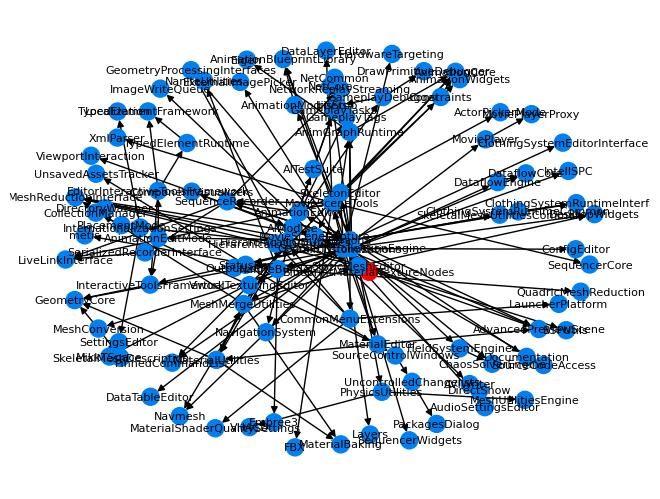

IntelISPC：Desc not available

GameplayTasks：GameplayTasks是虚幻引擎中的一个模块，它提供了游戏任务（Gameplay Tasks）系统的支持。游戏任务用于管理角色行为和行动序列，例如角色的动作、AI行为等。该模块提供了创建、管理和调度游戏任务的功能，使开发者能够更轻松地实现角色的行为逻辑。 | 游戏专用子系统 | 任务系统

AnimationBlueprintLibrary：AnimationBlueprintLibrary是虚幻引擎中的一个模块，它提供了与动画蓝图（Animation Blueprint）相关的功能。该模块包含了处理动画蓝图的创建、编辑和播放等操作的函数和工具。它对于实现角色动画和游戏中的动画逻辑非常重要。 | 游戏性基础 | 蓝图

PackagesDialog：PackagesDialog 模块为编辑器中的资产包管理提供用户界面。它允许用户创建、保存和加载包，以及管理包依赖关系并执行诸如在包之间迁移资产等操作。对于管理项目中的资产及其依赖关系，确保干净有序的工作流程非常重要。如果删除，用户将失去通过编辑器管理资产包的能力，使得组织和维护项目变得更加困难。| 资源 |资源管理器

AnimationModifiers：AnimationModifiers是虚幻引擎中的一个模块，它提供了动画修改器的功能。动画修改器用于对动画进行实时的修改和变换，例如调整骨骼姿势、变形网格等。该模块允许开发者使用AnimationModifiers模块创建和应用动画修改器，以实现动画的实时变换和调整。 | 骨骼动画

SourceControlWindows：SourceControlWindows是虚幻引擎中的一个模块，它提供了对Windows平台上源代码控制系统的支持。源代码控制系统用于管理和跟踪代码的版本历史和变更。该模块允许开发者与Windows上的源代码控制系统集成，并提供了一些源代码管理和协作的功能。 | 核心系统 | 版本控制

MovieSceneTools：提供了电影场景的编辑工具，如轨道编辑、关键帧编辑等。| 视频

DetailCustomizations：包含一些特殊的细节自定义，可以对编辑器中某些特定类型的资产进行特殊处理。| 资源 | 编辑器

ClothingSystemEdit

In [13]:
observe("BlueprintMaterialTextureNodes")